/Users/michielvanhouten/Dropbox/Mac/Documents/GitHub/abm/.venv/lib/python3.9/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


STAP1


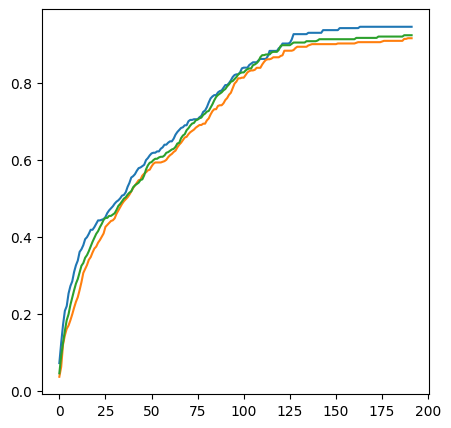

STAP1


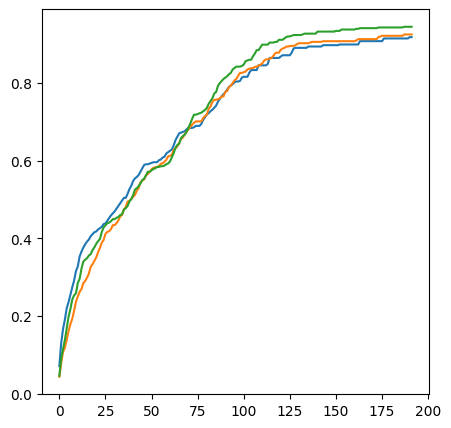

STAP1


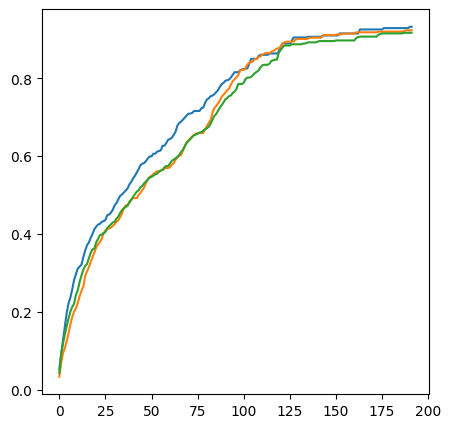

STAP1


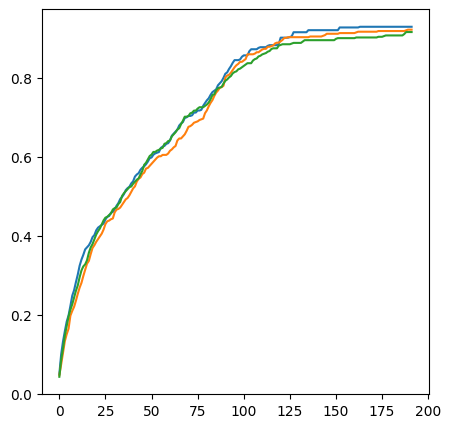

STAP1


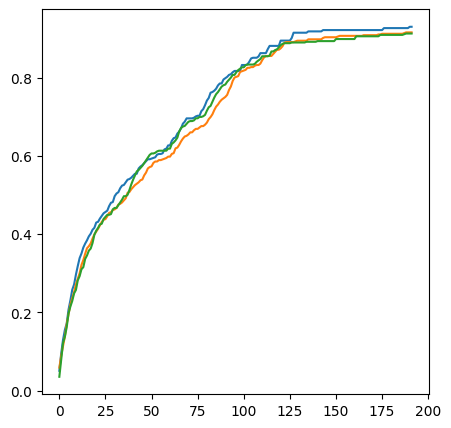

In [2]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

scenario1 = [32000, 396000]
scenario2 = [40000, 33000]
scenario3 = [26400, 48000]

aantal_iteraties = 5

avg_percentage_ev = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario1[0]
    fba = scenario1[1]

    model1 = SubsidieModel(ev, fba)
    model2 = SubsidieModel2(ev, fba)
    model3 = SubsidieModel3(ev, fba)
    for j in range(192):
        model1.step()
        model2.step()
        model3.step()

        
    data1 = model1.datacollector.get_model_vars_dataframe()
    data2 = model2.datacollector.get_model_vars_dataframe()
    data3 = model3.datacollector.get_model_vars_dataframe()
    
    plt.figure(figsize=(5, 5))

    # Lijnen tekenen voor elk model
    plt.plot(data1["Percerntage EV's van Auto's"], label='Model 1')
    plt.plot(data2["Percerntage EV's van Auto's"], label='Model 2')
    plt.plot(data3["Percerntage EV's van Auto's"], label='Model 3')

    plt.show()

STAP1


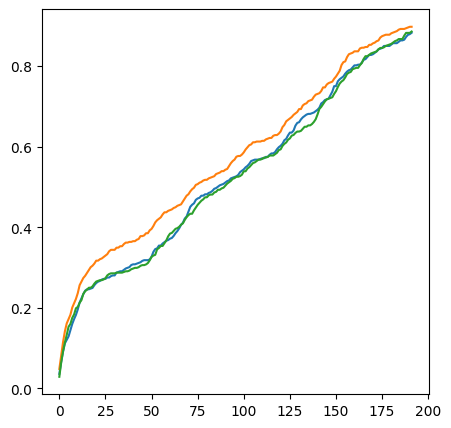

STAP1


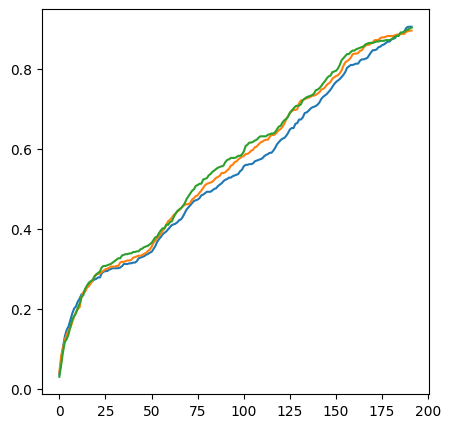

STAP1


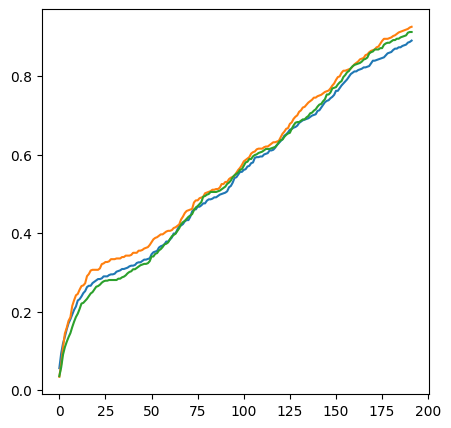

STAP1


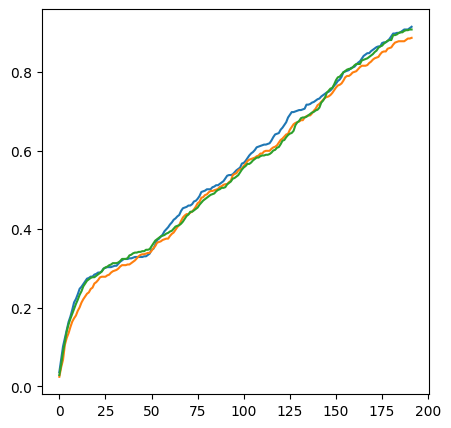

STAP1


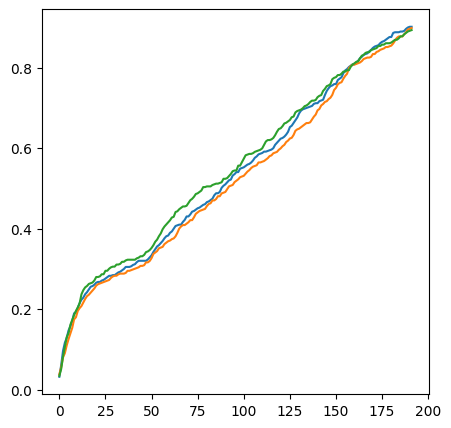

In [3]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

avg_percentage_ev2 = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario2[0]
    fba = scenario2[1]

    model4 = SubsidieModel(ev, fba)
    model5 = SubsidieModel2(ev, fba)
    model6 = SubsidieModel3(ev, fba)
    for j in range(192):
        model4.step()
        model5.step()
        model6.step()

        
    data4 = model4.datacollector.get_model_vars_dataframe()
    data5 = model5.datacollector.get_model_vars_dataframe()
    data6 = model6.datacollector.get_model_vars_dataframe()
    


    # Lijnen tekenen voor elk model
    plt.figure(figsize=(5, 5))

    # Lijnen tekenen voor elk model
    plt.plot(data4["Percerntage EV's van Auto's"], label='Model 1')
    plt.plot(data5["Percerntage EV's van Auto's"], label='Model 2')
    plt.plot(data6["Percerntage EV's van Auto's"], label='Model 3')

    plt.show()

STAP1


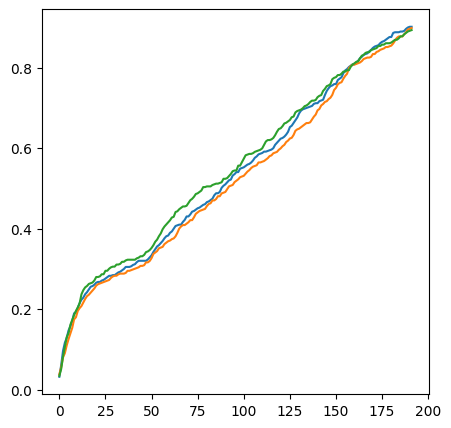

STAP1


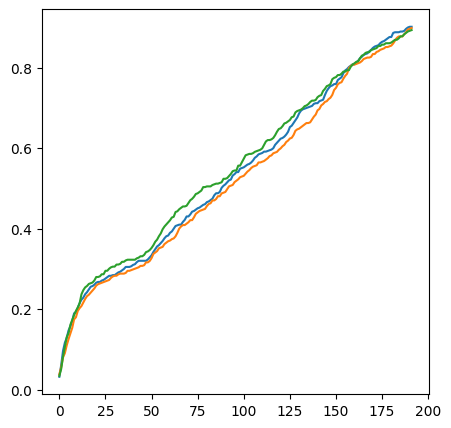

STAP1


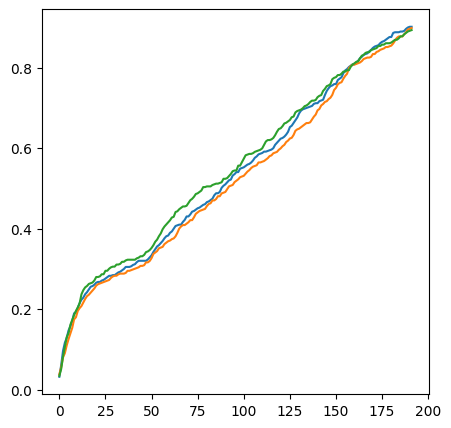

STAP1


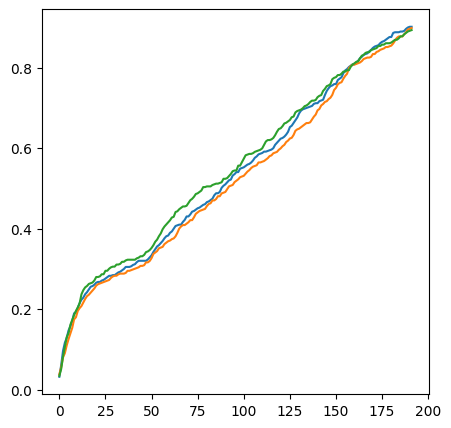

STAP1


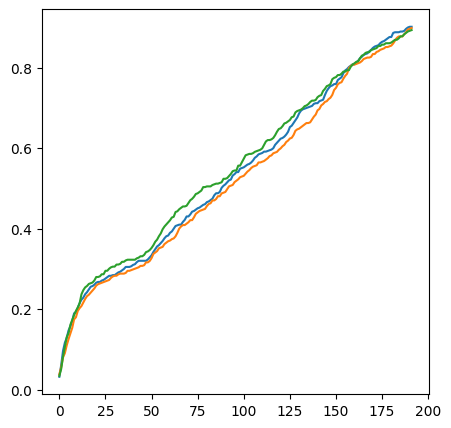

In [4]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

avg_percentage_ev3 = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario3[0]
    fba = scenario3[1]

    model7 = SubsidieModel(ev, fba)
    model8 = SubsidieModel2(ev, fba)
    model9 = SubsidieModel3(ev, fba)
    for j in range(192):
        model7.step()
        model8.step()
        model9.step()

        
    data7 = model7.datacollector.get_model_vars_dataframe()
    data8 = model8.datacollector.get_model_vars_dataframe()
    data9 = model9.datacollector.get_model_vars_dataframe()
    


    # Lijnen tekenen voor elk model
    plt.figure(figsize=(5, 5))

    # Lijnen tekenen voor elk model
    plt.plot(data4["Percerntage EV's van Auto's"], label='Model 1')
    plt.plot(data5["Percerntage EV's van Auto's"], label='Model 2')
    plt.plot(data6["Percerntage EV's van Auto's"], label='Model 3')

    plt.show()